# Oscar Dominguez
# Part 4 - Hypothesis Testing

# Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

## Hypothesis -
- $H_0$ (Null Hypothesis): MPAA ratings of a movie has no effect on Revenue
- $H_A$ (Alternate Hypothesis): MPAA ratings of a movie DOES have an effect on Revenue


In [1]:
import glob
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt

q = "Data/final_tmdb_data_201*.csv.gz"
chunked_files = sorted(glob.glob(q))
# Showing the first 5 
chunked_files

['Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz']

In [2]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0,lineterminator='\n') for file in chunked_files])
df_combined

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0312305,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13
tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN
tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.125,12.0,NaN
tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,NaN
tt9913872,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,NaN,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,NaN


In [3]:
## Saving the final combined dataframe
final_fname ='Data/title_basics_combined.csv.gz'
df_combined.to_csv(final_fname, compression='gzip', index=False)


In [4]:
df_combined = pd.read_csv(final_fname,lineterminator='\n')
df_combined


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,7.900,8.0,NaN
2,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13
3,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.000,1.0,NaN
4,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.000,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38146,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.125,12.0,NaN
38147,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,NaN
38148,0.0,/a0kySBmMZ77AqmNA3pDu45GsbCp.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,800030.0,es,De la piel del Diablo,NaN,...,0.0,0.0,[],Released,NaN,De la piel del Diablo,0.0,8.200,3.0,NaN
38149,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,"Pep, a 13-year-old boy, is in love with a girl...",...,0.0,74.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.700,7.0,NaN


In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38151 entries, 0 to 38150
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  38141 non-null  float64
 1   backdrop_path          25283 non-null  object 
 2   belongs_to_collection  2499 non-null   object 
 3   budget                 38141 non-null  float64
 4   genres                 38141 non-null  object 
 5   homepage               10065 non-null  object 
 6   id                     38141 non-null  float64
 7   original_language      38141 non-null  object 
 8   original_title         38141 non-null  object 
 9   overview               37314 non-null  object 
 10  popularity             38141 non-null  float64
 11  poster_path            35391 non-null  object 
 12  production_companies   38141 non-null  object 
 13  production_countries   38141 non-null  object 
 14  release_date           37606 non-null  object 
 15  re

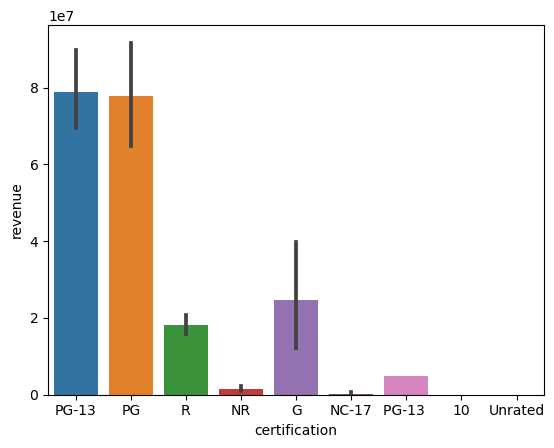

In [6]:
#Plotting different regions or groups and displaying charges for each
sns.barplot(data=df_combined, x='certification',y='revenue');

In [7]:
#does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie 
#generates?

df_combined['certification'].value_counts()

R          3117
NR         2314
PG-13      1759
PG          799
G           272
NC-17       100
Unrated       4
PG-13         1
10            1
Name: certification, dtype: int64

In [8]:
# I checked to see if the second PG-13 had a space at the end to remove
df_combined[df_combined['certification'] == 'PG-13 ']

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
14245,0.0,/aJxq9qRoOuVPCRagcDNVB4nrDan.jpg,NaN,0.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,262958.0,en,Jimmy's Hall,Jimmy Gralton returns from New York and reopen...,...,4825184.0,106.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Where Anything Goes and Everyone Belongs.,Jimmy's Hall,0.0,6.7,162.0,PG-13


## Re-classifying certification categories

In [9]:
repl_cert = {'Unrated':'NR',
             'PG-13 ':'PG-13',
             '10':'PG-13'}
df_combined['certification'] = df_combined['certification'].replace(repl_cert)

In [10]:
df_combined['certification'].value_counts()

R        3117
NR       2318
PG-13    1761
PG        799
G         272
NC-17     100
Name: certification, dtype: int64

## Separating Groups



In [11]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df_combined['certification'].unique():
    ## Get series for group and rename
    data = df_combined.loc[df_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17'])

In [12]:
# Dropping rows that are null for columns
df_combined=df_combined.dropna(subset=['certification'])
df_combined=df_combined.dropna(subset=['revenue'])
#df_combined =df_combined[df_combined['revenue'] !=0]

In [13]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df_combined['certification'].unique():
    ## Get series for group and rename
    data = df_combined.loc[df_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'PG', 'R', 'NR', 'G', 'NC-17'])

## Testing for assumption of Normality. 

In [14]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,1761.0,0.000000e+00,1784.945382
PG,799.0,3.645016e-146,669.768125
R,3117.0,0.000000e+00,3937.525012
NR,2318.0,0.000000e+00,5127.159866
G,272.0,8.051127e-82,373.452331
NC-17,100.0,1.376587e-35,160.541742


In [15]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
PG-13,1761.0,0.000000e+00,1784.945382,True
PG,799.0,3.645016e-146,669.768125,True
R,3117.0,0.000000e+00,3937.525012,True
NR,2318.0,0.000000e+00,5127.159866,True
G,272.0,8.051127e-82,373.452331,True
NC-17,100.0,1.376587e-35,160.541742,True


## Testing Assumption of Equal Variance

In [16]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=106.80027862276603, pvalue=1.1857606798464516e-109)

## One-Way ANOVA Test


In [17]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=1170.6247280679024, pvalue=6.7706125663934066e-251)

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the certification
values = df_combined['revenue']
labels = df_combined['certification']

In [19]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-24360761.639,0.557,-66133913.4589,17412390.181,False
G,NR,-23043846.701,0.0474,-45937702.3769,-149991.0251,True
G,PG,53094735.3211,0.0,28019378.5876,78170092.0546,True
G,PG-13,54149255.8641,0.0,30878269.8161,77420241.9121,True
G,R,-6531032.1307,0.9631,-29114631.3368,16052567.0754,False
NC-17,NR,1316914.938,1.0,-35165338.7439,37799168.6198,False
NC-17,PG,77455496.9601,0.0,39566188.1605,115344805.7597,True
NC-17,PG-13,78510017.5031,0.0,41789927.666,115230107.3402,True
NC-17,R,17829729.5083,0.7268,-18458631.6989,54118090.7154,False
NR,PG,76138582.0221,0.0,61484840.6552,90792323.389,True


## Answer - Tukeyhsd multiple comparison test confirms there is a is a difference when comparing G/NR, NR/PG, NR/PG-13, PG/R, and PG-13/R 

## Final Conclusion 
We reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between certain pairs of groups.

# Second test 
Do some movie genres earn more revenue than others?

## Hypothesis -
- $H_0$ (Null Hypothesis): Movie genres have no effect on Revenue
- $H_A$ (Alternate Hypothesis): Movie genres DOES have an effect on Revenue

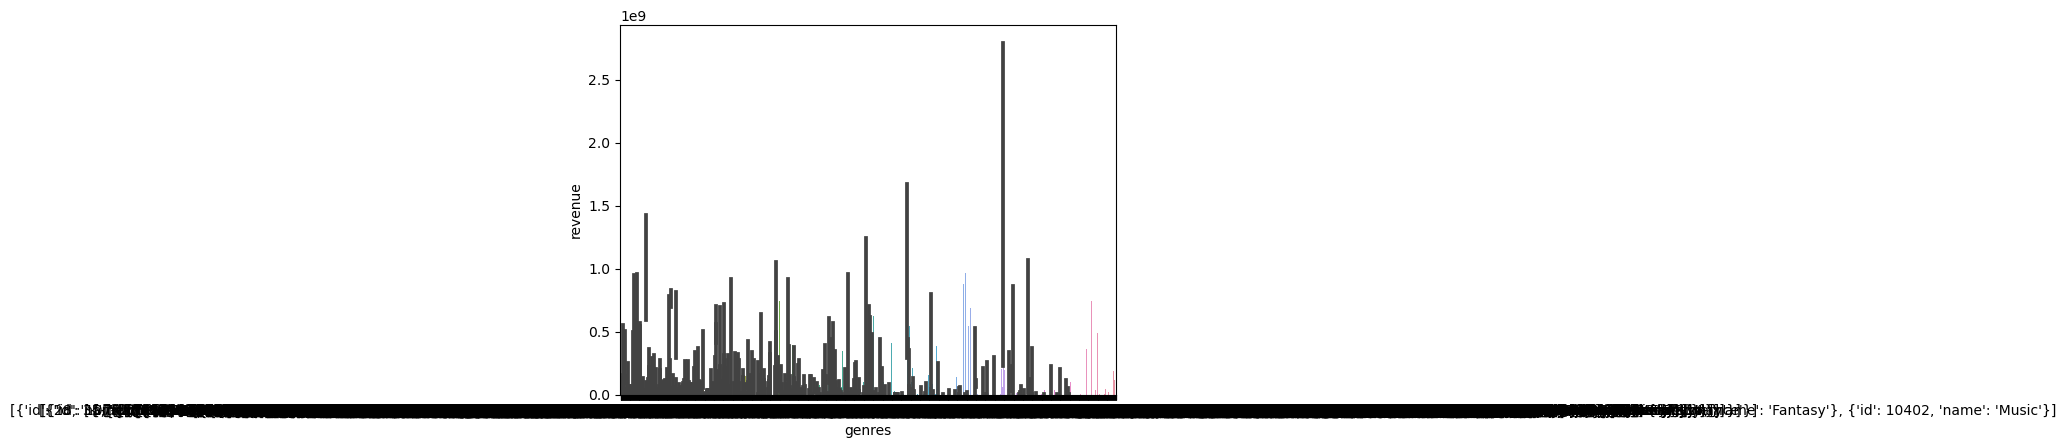

In [20]:
#Plotting different regions or groups and displaying charges for each
sns.barplot(data=df_combined, x='genres',y='revenue');

In [21]:
df_combined=df_combined.dropna(subset=['genres'])

In [22]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [23]:
## Use ourn function and exploding the new column
df_combined['genres_list'] = df_combined['genres'].apply(get_genre_name)
df_explode = df_combined.explode('genres_list')
df_explode

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
2,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13,Thriller
2,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13,Mystery
2,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13,Drama
5,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.600,10224.0,PG,Animation
5,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.600,10224.0,PG,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38125,0.0,/h5sUE9jqoYrjsFjANJXL0gpZGye.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",NaN,624779.0,en,VFW,A typical night for veterans at a VFW turns in...,...,92.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,It's Gonna Get Bloody!,VFW,0.0,5.882,190.0,NR,Action
38125,0.0,/h5sUE9jqoYrjsFjANJXL0gpZGye.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",NaN,624779.0,en,VFW,A typical night for veterans at a VFW turns in...,...,92.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,It's Gonna Get Bloody!,VFW,0.0,5.882,190.0,NR,Horror
38127,0.0,/l2Ao3NXfrXtWzlBZ5DnP2l2szJj.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",https://www.pilgrims.movie/,595172.0,en,The Pilgrim's Progress,"An epic journey, faithfully adapted to modern-...",...,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Pilgrim's Progress,0.0,7.750,78.0,PG,Animation
38127,0.0,/l2Ao3NXfrXtWzlBZ5DnP2l2szJj.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",https://www.pilgrims.movie/,595172.0,en,The Pilgrim's Progress,"An epic journey, faithfully adapted to modern-...",...,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Pilgrim's Progress,0.0,7.750,78.0,PG,Adventure


In [24]:
df_explode['genres_list'].value_counts()

Drama              3731
Comedy             2373
Thriller           2147
Horror             1691
Action             1488
Romance            1007
Adventure           876
Crime               848
Family              749
Science Fiction     742
Fantasy             614
Mystery             576
Animation           572
History             292
Music               202
War                 163
Western             100
TV Movie             46
Documentary          31
Name: genres_list, dtype: int64

In [25]:
df_explode=df_explode.dropna(subset=['genres_list'])

## Getting list of genres 

In [26]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df_explode['genres_list'].unique():
    ## Get series for group and rename
    data = df_explode.loc[df_explode['genres_list']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['Thriller', 'Mystery', 'Drama', 'Animation', 'Family', 'Crime', 'Action', 'Science Fiction', 'Comedy', 'Adventure', 'Romance', 'Horror', 'Fantasy', 'History', 'War', 'Music', 'Western', 'Documentary', 'TV Movie'])

## Testing for assumption of Normality 

In [46]:
# Using exploded dataframe because we have the columns and genres how want them
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
Thriller,2147.0,0.000000e+00,3175.132781
Mystery,576.0,3.187767e-99,453.593207
Drama,3731.0,0.000000e+00,5474.448296
Animation,572.0,6.449841e-97,442.973397
Family,749.0,1.483215e-128,588.673360
Crime,848.0,5.529141e-267,1226.160375
Action,1488.0,0.000000e+00,1440.562512
Science Fiction,742.0,2.596932e-160,734.918569
Comedy,2373.0,0.000000e+00,2622.363829
Adventure,876.0,7.834288e-127,580.739594


## Testing Assumption of Equal Variance

In [28]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=64.61036989704812, pvalue=3.112754713315769e-228)

## One-Way ANOVA Test

In [29]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=770.3171117678672, pvalue=6.553173837016681e-152)

In [30]:
## save the values as revenue and the labels to the certification
values = df_explode['revenue']
labels = df_explode['genres_list']

In [31]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,71059458.7174,0.0,48307172.5399,93811744.8949,True
Action,Animation,1373059.5856,1.0,-24910788.8623,27656908.0335,False
Action,Comedy,-51129157.583,0.0,-68795815.1142,-33462500.0517,True
Action,Crime,-56794998.4944,0.0,-79782504.2877,-33807492.7011,True
Action,Documentary,-86150042.084,0.1577,-183100842.4327,10800758.2647,False
Action,Drama,-67635382.2202,0.0,-84016154.861,-51254609.5793,True
Action,Family,-2763134.4485,1.0,-26698796.3565,21172527.4595,False
Action,Fantasy,20766106.8997,0.3015,-4860170.8474,46392384.6468,False
Action,History,-53660773.81,0.0,-87856508.1156,-19465039.5045,True
Action,Horror,-75907982.8599,0.0,-94898063.9294,-56917901.7904,True


## Answer - Tukeyhsd multiple comparison test confirms there is a is a difference when comparing G/NR, NR/PG, NR/PG-13, PG/R, and PG-13/R 

## Final Conclusion 
- We reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between some pairs of groups.

# Third Test 
Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

## Hypothesis -
- $H_0$ (Null Hypothesis): there is NO difference in revenue earned between movies under 1.5 hours vs movies that are over 2.5 hours
- $H_A$ (Alternate Hypothesis): there is a difference in revenue earned between movies under 1.5 hours vs movies that are over 2.5 hours


In [32]:
df_combined['runtime']

2         90.0
5        100.0
7         92.0
8        112.0
9         95.0
         ...  
38091     83.0
38113     93.0
38125     92.0
38127    108.0
38142    107.0
Name: runtime, Length: 8367, dtype: float64

In [33]:
# Getting mean values for each group
less_than_90_mins = df_combined.loc[df_combined['runtime']< 90,"revenue"]
more_than_160_mins = df_combined.loc[df_combined['runtime']> 160 ,"revenue"]

In [34]:
# Adding column to use for hue in plotting in next cell
# Resource -
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

df_combined['is_less_than_90_mins'] = np.where(df_combined['runtime']> 90, False, True)
df_combined.head(10)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list,is_less_than_90_mins
2,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,"A sleepwalking, sexaholic masseur wakes up, co...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking can be deadly.,In My Sleep,0.0,5.500,31.0,PG-13,"[Thriller, Mystery, Drama]",True
5,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.600,10224.0,PG,"[Animation, Family]",False
7,0.0,/rbB7g8YBFMLKtmwB8QEvVlKh5Yh.jpg,"{'id': 294172, 'name': 'Tekken Collection', 'p...",30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,42194.0,en,Tekken,"In the year of 2039, after World Wars destroy ...",...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Survival is no game,Tekken,0.0,5.368,600.0,R,"[Crime, Drama, Action, Thriller, Science Fiction]",False
8,0.0,/k4pJqDV8cJdOPiZ83bl9K5f90QG.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,200094.0,en,Disconnect,A distraught college student finds a phone tha...,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Disconnect,0.0,6.200,8.0,NR,"[Thriller, Mystery, Crime, Science Fiction]",False
9,0.0,/muSdbwHzlwEtam7gdUWmqFYukZb.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,68716.0,en,Venus & Vegas,When three Vegas buddies attempt the score of ...,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If Women are from Venus, Men are from VEGAS!",Venus & Vegas,0.0,4.000,22.0,R,"[Action, Comedy]",False
10,0.0,/wyszKdzQylU0i8SI2O8xCce8zLn.jpg,NaN,69000000.0,"[{'id': 35, 'name': 'Comedy'}]",http://www.dinnerforschmucks.com/,38778.0,en,Dinner for Schmucks,Rising executive Tim Conrad works for a boss w...,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Takes One To Know One.,Dinner for Schmucks,0.0,5.692,1601.0,PG-13,[Comedy],False
11,0.0,/puAUfSiVrQO2DPKOobHFjqVcXPt.jpg,NaN,110000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",https://www.20thcenturystudios.com/movies/the-...,34544.0,en,The A-Team,A group of Iraq War veterans goes on the run f...,...,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,There Is No Plan B,The A-Team,0.0,6.393,4208.0,PG-13,"[Thriller, Action, Adventure, Comedy, Crime]",False
12,0.0,/drIxCVyHbWWjtmlurRaAf7dHXc9.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193.0,en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,No toy gets left behind.,Toy Story 3,0.0,7.792,13441.0,G,"[Animation, Family, Comedy]",False
15,0.0,/7zwngyl6Cg4NeD4AIOfpXgrcDv6.jpg,NaN,85000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.scottpilgrimthemovie.com/,22538.0,en,Scott Pilgrim vs. the World,"As bass guitarist for a garage-rock band, Scot...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Get the hot girl. Defeat her evil exes. Hit lo...,Scott Pilgrim vs. the World,0.0,7.500,6951.0,PG-13,"[Action, Comedy, Romance]",False
16,0.0,NaN,NaN,0.0,[],NaN,185200.0,en,Mad World,"In this independent drama, writer-director Cor...",...,[],Released,NaN,Mad World,0.0,4.300,3.0,R,[],False


In [36]:
#Creating Dataframes to plot
less_than_90_df = df_combined.loc[df_combined['is_less_than_90_mins']==True, ['runtime','is_less_than_90_mins']]
more_than_160_df = df_combined.loc[df_combined['is_less_than_90_mins']==False, ['runtime','is_less_than_90_mins']]


In [37]:
# Plotting
plot_df = pd.concat([less_than_90_df,more_than_160_df], axis=0)

plot_df

,runtime,is_less_than_90_mins
2,90.0,True
23,88.0,True
24,82.0,True
40,83.0,True
43,80.0,True
...,...,...
38084,98.0,False
38113,93.0,False
38125,92.0,False
38127,108.0,False


/var/folders/5f/y13jb9491kgdgn16m3t57fq80000gn/T/ipykernel_93461/1241447291.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=plot_df, x='is_less_than_90_mins',y='runtime', ci=95)


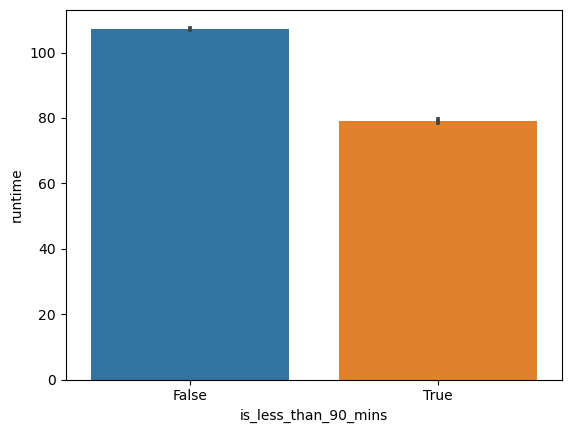

In [38]:
# Plotting
ax = sns.barplot(data=plot_df, x='is_less_than_90_mins',y='runtime', ci=95)

## Checking assumptions of 2-Sample T-
- No significant outliers
- Normality
- Equal Variance

## Outliers

In [39]:
less_than_90_group = less_than_90_df['runtime']
more_than_160_group = more_than_160_df['runtime']

display(less_than_90_group.head(), more_than_160_group.head())

2     90.0
23    88.0
24    82.0
40    83.0
43    80.0
Name: runtime, dtype: float64

5     100.0
7      92.0
8     112.0
9      95.0
10    114.0
Name: runtime, dtype: float64

In [40]:
# Checking outlier count
is_outlier_less_than_90 = np.abs(stats.zscore(less_than_90_group)) > 3
print(f'There are {is_outlier_less_than_90.sum()} outliers in the non-sale group out of {len(is_outlier_less_than_90)} items')


There are 116 outliers in the non-sale group out of 3206 items


In [41]:
# Removing outliers
non_sale_items_df = less_than_90_df.loc[~is_outlier_less_than_90]
non_sale_items_df

,runtime,is_less_than_90_mins
2,90.0,True
23,88.0,True
24,82.0,True
40,83.0,True
43,80.0,True
...,...,...
38036,68.0,True
38041,61.0,True
38042,87.0,True
38046,90.0,True


In [42]:
# Checking outlier count
is_outlier_more_than_160 = np.abs(stats.zscore(more_than_160_group)) > 3
print(f'There are {is_outlier_more_than_160.sum()} outliers in the non-sale group out of {len(is_outlier_more_than_160)} items')


There are 81 outliers in the non-sale group out of 5161 items


In [43]:
# Removing outliers
more_than_160_df = more_than_160_df.loc[~is_outlier_more_than_160]
more_than_160_df

,runtime,is_less_than_90_mins
5,100.0,False
7,92.0,False
8,112.0,False
9,95.0,False
10,114.0,False
...,...,...
38084,98.0,False
38113,93.0,False
38125,92.0,False
38127,108.0,False


## Checking for Normality
- Since both our groups have n > 15, we can safely ignore the assumption of normality


## Checking for Equal Variance

In [44]:
result = stats.levene(less_than_90_group,more_than_160_group)
print(result)
print(result.pvalue < .05)


LeveneResult(statistic=47.7099454024137, pvalue=5.30322638924723e-12)
True


- According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject the null hypothesis and conclude that our groups do NOT have equal variance
- Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False

# Statistical Test

In [45]:
result = stats.ttest_ind(less_than_90_group, more_than_160_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=-74.83963245840508, pvalue=0.0)


True

# Final Conclusion
- Our Welch's T-Test returns a p-value < .05 we reject the null hypothesis and support the alternative hypothesis that there is a significant difference between movies with 90 vs 160 minutes and revenue

